In [1]:
import numpy as np 
import pandas as pd
#import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from keras.utils  import to_categorical 
import pickle
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from imutils.video import VideoStream
import argparse
import datetime
import imutils
import time

In [5]:
from keras import models
model = models.load_model('new.h5')

In [7]:
def check_defection(fruit):
    p = model.predict_classes(fruit.reshape(1,100,100,3))
    if p==[0]:
        print("Fresh")
    else:
        print("Defected")

In [4]:
currentframe = 0
    
    
    

#save_path="./img/"

# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-f", "--fff", help="a dummy argument to fool ipython", default="1")
ap.add_argument("-v", "--video", help="path to the video file")
ap.add_argument("-a", "--min-area", type=int, default=750, help="minimum area size")
#args, unknown = parser.parse_known_args()
args = vars(ap.parse_args())



# if the video argument is None, then we are reading from webcam
if args.get("video", None) is None:
    vs = VideoStream(src=0).start()
    time.sleep(2.0)
# otherwise, we are reading from a video file
else:
    vs = cv2.VideoCapture(args["video"])
# initialize the first frame in the video stream
firstFrame = None



# loop over the frames of the video
while True:
    # grab the current frame and initialize the occupied/unoccupied
    # text
    frame = vs.read()
    frame = frame if args.get("video", None) is None else frame[1]
    text = "Unoccupied"
    # if the frame could not be grabbed, then we have reached the end
    # of the video
    if frame is None:
        break
    # resize the frame, convert it to grayscale, and blur it
    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (21, 21), 0)
    # if the first frame is None, initialize it
    if firstFrame is None:
        firstFrame = gray
        continue
        

        
# compute the absolute difference between the current frame and
    # first frame
    frameDelta = cv2.absdiff(firstFrame, gray)
    thresh = cv2.threshold(frameDelta, 25, 255, cv2.THRESH_BINARY)[1]
    # dilate the thresholded image to fill in holes, then find contours
    # on thresholded image
    thresh = cv2.dilate(thresh, None, iterations=2)
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    # loop over the contours
    for c in cnts:
        # if the contour is too small, ignore it
        if cv2.contourArea(c) < args["min_area"]:
            continue
            
        # compute the bounding box for the contour, draw it on the frame,
        # and update the text
        #(x, y, w, h) = cv2.boundingRect(c)
        #cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        
        text = "Occupied"
        #cv2.imwrite (save_path + str ( datetime.datetime.now().strftime("%A %d %B %Y %I:%M:%S%p")) + ".jpg", frame )
        
        
        if text =="Occupied":
            time.sleep(1)
            # if video is still left continue creating images
            name = './data/frame' + str(currentframe) + '.jpg'
            print('Creating...' + name)

            # writing the extracted images
            cv2.imwrite(name, frame)

            # increasing counter so that it will
            # show how many frames are created
            currentframe += 1
            time.sleep(1)
        

        # draw the text and timestamp on the frame
    cv2.putText(frame, "Room Status: {}".format(text), (10, 20),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    cv2.putText(frame, datetime.datetime.now().strftime("%A %d %B %Y %I:%M:%S%p"),
        (10, frame.shape[0] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.35, (0, 0, 255), 1)
    
    
    
    # show the frame and record if the user presses a key
    cv2.imshow("Security Feed", frame)
    cv2.imshow("Thresh", thresh)
    cv2.imshow("Frame Delta", frameDelta)
    key = cv2.waitKey(1) & 0xFF
    # if the `q` key is pressed, break from the lop
    if key == ord("q"):
        break
# cleanup the camera and close any open windows
vs.stop() if args.get("video", None) is None else vs.release()
cv2.destroyAllWindows()

Creating..../data/frame0.jpg
Creating..../data/frame1.jpg
Creating..../data/frame2.jpg
Creating..../data/frame3.jpg
Creating..../data/frame4.jpg
Creating..../data/frame5.jpg
Creating..../data/frame6.jpg


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Fresh


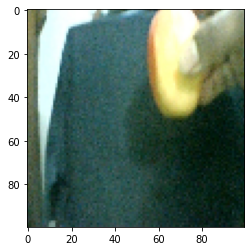

In [8]:
img = cv2.imread("./data/frame5.jpg")
img=cv2.resize(img,(100,100))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
X=np.array(img)
X=X/255.0
check_defection(X)